<a href="https://colab.research.google.com/github/codpile/codepile-backend/blob/main/STEM_Performance(RandomForest_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

In [ ]:
df = pd.read_csv('drive/My Drive/FYP/STD.csv')
df

Age  Gender    Region District Language Spoken by Student  Math Term 1  \
0      17  Female   Eastern   Kitgum                     Acholi           43   
1      15  Female   Central   Mukono                 Runyankole           71   
2      17  Female   Eastern    Jinja                     Lusoga           56   
3      15    Male   Western  Kampala                     Rukiga           63   
4      15    Male   Central    Jinja                     Lusoga           88   
...   ...     ...       ...      ...                        ...          ...   
4995   15    Male  Northern  Mbarara                      Iteso          100   
4996   15  Female  Northern  Mbarara                    Luganda           68   
4997   16  Female   Western  Entebbe                     Rukiga           99   
4998   17    Male   Eastern  Mbarara                  Lumasaaba          100   
4999   16  Female  Northern    Mbale                    Luganda           59   

      Physics Term 1  Chemistry Term 1  Math Term 2  Physics Term 2  \
0                 50                77           70             100   
1                 45                82           23              82   
2                100                88           79              59   
3                 82                70           62             100   
4                 63                70           82              87   
...              ...               ...          ...             ...   
4995             100                59           62              85   
4996             100                98           46              53   
4997              99                94           77              66   
4998              60                34           38              32   
4999              59                87           65              68   

      Chemistry Term 2  Math Term 3  Physics Term 3  Chemistry Term 3  \
0                   46           56              43                71   
1                   68           82              50                75   
2                   65           63             100                47   
3                   97           72              59                78   
4                   49           93              41                94   
...                ...          ...             ...               ...   
4995                97           77              47                49   
4996               100          100             100                74   
4997                82           72             100                96   
4998               100           88              23                81   
4999               100           66              29                83   

      Attendance  
0           0.90  
1           0.81  
2           0.97  
3           0.89  
4           0.82  
...          ...  
4995        0.83  
4996        0.97  
4997        0.97  
4998        0.93  
4999        0.92  

[5000 rows x 15 columns]

In [ ]:
df['Overall Performance'] = df[['Math Term 1', 'Math Term 2', 'Math Term 3', 'Physics Term 1', 'Physics Term 2', 'Physics Term 3', 'Chemistry Term 1', 'Chemistry Term 2', 'Chemistry Term 3']].mean(axis=1)
df

Age  Gender    Region District Language Spoken by Student  Math Term 1  \
0      17  Female   Eastern   Kitgum                     Acholi           43   
1      15  Female   Central   Mukono                 Runyankole           71   
2      17  Female   Eastern    Jinja                     Lusoga           56   
3      15    Male   Western  Kampala                     Rukiga           63   
4      15    Male   Central    Jinja                     Lusoga           88   
...   ...     ...       ...      ...                        ...          ...   
4995   15    Male  Northern  Mbarara                      Iteso          100   
4996   15  Female  Northern  Mbarara                    Luganda           68   
4997   16  Female   Western  Entebbe                     Rukiga           99   
4998   17    Male   Eastern  Mbarara                  Lumasaaba          100   
4999   16  Female  Northern    Mbale                    Luganda           59   

      Physics Term 1  Chemistry Term 1  Math Term 2  Physics Term 2  \
0                 50                77           70             100   
1                 45                82           23              82   
2                100                88           79              59   
3                 82                70           62             100   
4                 63                70           82              87   
...              ...               ...          ...             ...   
4995             100                59           62              85   
4996             100                98           46              53   
4997              99                94           77              66   
4998              60                34           38              32   
4999              59                87           65              68   

      Chemistry Term 2  Math Term 3  Physics Term 3  Chemistry Term 3  \
0                   46           56              43                71   
1                   68           82              50                75   
2                   65           63             100                47   
3                   97           72              59                78   
4                   49           93              41                94   
...                ...          ...             ...               ...   
4995                97           77              47                49   
4996               100          100             100                74   
4997                82           72             100                96   
4998               100           88              23                81   
4999               100           66              29                83   

      Attendance  Overall Performance  
0           0.90            61.777778  
1           0.81            64.222222  
2           0.97            73.000000  
3           0.89            75.888889  
4           0.82            74.111111  
...          ...                  ...  
4995        0.83            75.111111  
4996        0.97            82.111111  
4997        0.97            87.222222  
4998        0.93            61.777778  
4999        0.92            68.444444  

[5000 rows x 16 columns]

In [ ]:
# Check for missing values
print(df.isnull().sum())

Age                           0
Gender                        0
Region                        0
District                      0
Language Spoken by Student    0
Math Term 1                   0
Physics Term 1                0
Chemistry Term 1              0
Math Term 2                   0
Physics Term 2                0
Chemistry Term 2              0
Math Term 3                   0
Physics Term 3                0
Chemistry Term 3              0
Attendance                    0
Overall Performance           0
dtype: int64


In [ ]:
# summary of statistics
print(df.describe())

               Age  Math Term 1  Physics Term 1  Chemistry Term 1  \
count  5000.000000  5000.000000     5000.000000       5000.000000   
mean     15.852000    74.518000       82.505800         71.426200   
std       0.846782    18.759831       20.306118         21.859188   
min      15.000000    19.000000        6.000000         26.000000   
25%      15.000000    62.000000       70.000000         55.000000   
50%      16.000000    77.000000       90.000000         73.000000   
75%      17.000000    90.000000      100.000000         91.000000   
max      17.000000   100.000000      100.000000        100.000000   

       Math Term 2  Physics Term 2  Chemistry Term 2  Math Term 3  \
count  5000.000000     5000.000000       5000.000000  5000.000000   
mean     63.683200       64.901200         85.795600    71.890800   
std      17.691847       17.922625         15.671699    18.820768   
min      23.000000       10.000000         24.000000    19.000000   
25%      51.000000       53.00000

In [ ]:
# VISUALIZATION OF THE DATA

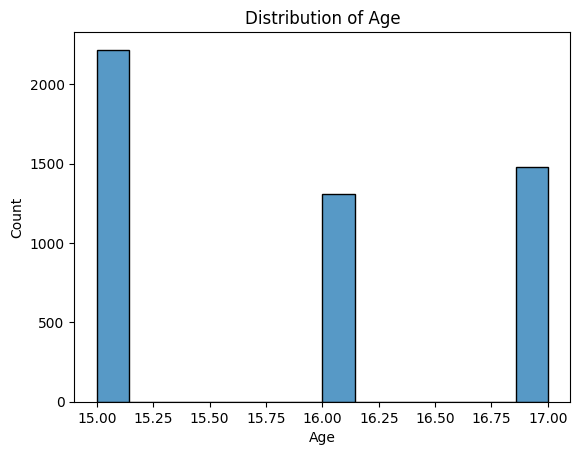

In [ ]:
# Distribution of age
sns.histplot(data=df, x="Age")
plt.title("Distribution of Age")
plt.show()

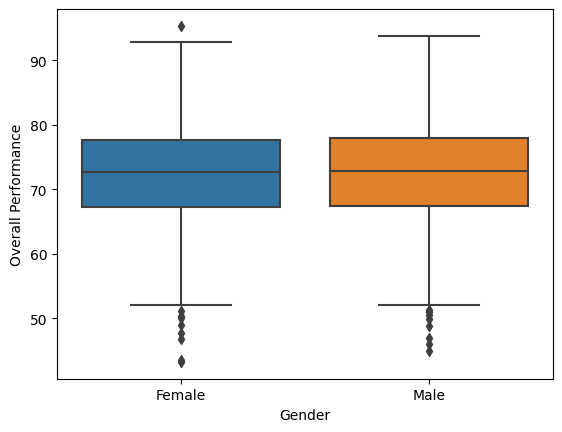

In [ ]:

sns.boxplot(x='Gender', y='Overall Performance', data=df)
plt.show()

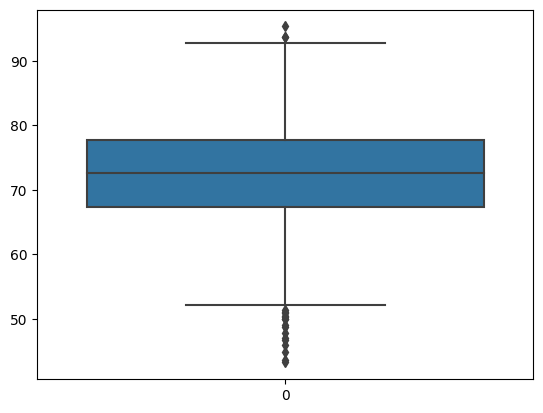

In [ ]:
# Identify outliers
sns.boxplot(df['Overall Performance'])
plt.show()


In [ ]:
#CHANGING THE CATEGORICAL DATA TO NUMERICAL DATA

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
Gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}

df['Region'] = encoder.fit_transform(df['Region'])
Region_mappings = {index: label for index, label in enumerate(encoder.classes_)}

df['District'] = encoder.fit_transform(df['District'])
District_mappings = {index: label for index, label in enumerate(encoder.classes_)}

Language_Spoken_by_Student_mappings = {index: label for index, label in enumerate(encoder.classes_)}
df['Language Spoken by Student'] = encoder.fit_transform(df['Language Spoken by Student'])

In [ ]:
df

Age  Gender  Region  District  Language Spoken by Student  Math Term 1  \
0      17       0       1        15                           0           43   
1      15       0       0        24                          17           71   
2      17       0       1         8                          14           56   
3      15       1       4        11                          15           63   
4      15       1       0         8                          14           88   
...   ...     ...     ...       ...                         ...          ...   
4995   15       1       3        20                           3          100   
4996   15       0       3        20                           7           68   
4997   16       0       4         5                          15           99   
4998   17       1       1        20                          10          100   
4999   16       0       3        19                           7           59   

      Physics Term 1  Chemistry Term 1  Math Term 2  Physics Term 2  \
0                 50                77           70             100   
1                 45                82           23              82   
2                100                88           79              59   
3                 82                70           62             100   
4                 63                70           82              87   
...              ...               ...          ...             ...   
4995             100                59           62              85   
4996             100                98           46              53   
4997              99                94           77              66   
4998              60                34           38              32   
4999              59                87           65              68   

      Chemistry Term 2  Math Term 3  Physics Term 3  Chemistry Term 3  \
0                   46           56              43                71   
1                   68           82              50                75   
2                   65           63             100                47   
3                   97           72              59                78   
4                   49           93              41                94   
...                ...          ...             ...               ...   
4995                97           77              47                49   
4996               100          100             100                74   
4997                82           72             100                96   
4998               100           88              23                81   
4999               100           66              29                83   

      Attendance  Overall Performance  
0           0.90            61.777778  
1           0.81            64.222222  
2           0.97            73.000000  
3           0.89            75.888889  
4           0.82            74.111111  
...          ...                  ...  
4995        0.83            75.111111  
4996        0.97            82.111111  
4997        0.97            87.222222  
4998        0.93            61.777778  
4999        0.92            68.444444  

[5000 rows x 16 columns]

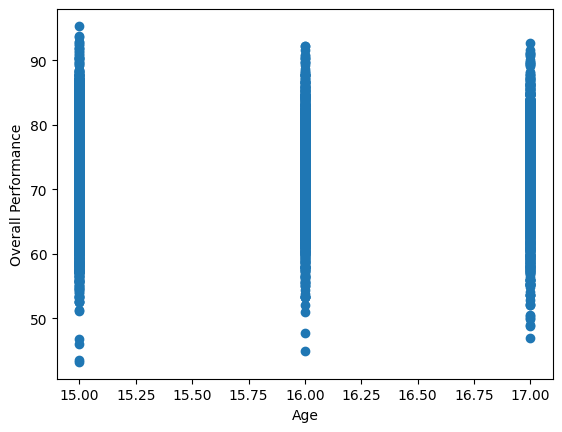

In [ ]:
plt.scatter(df['Age'], df['Overall Performance'])
plt.xlabel('Age')
plt.ylabel('Overall Performance')
plt.show()

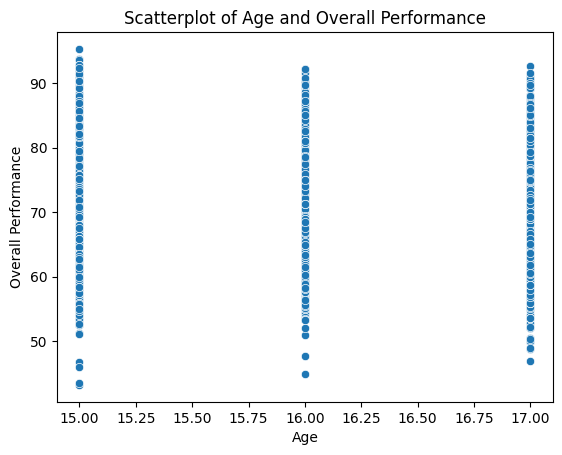

In [ ]:
sns.scatterplot(data=df, x="Age", y="Overall Performance")
plt.title("Scatterplot of Age and Overall Performance")
plt.show()


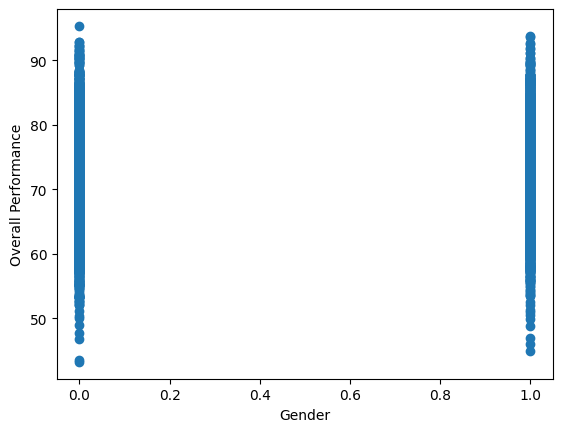

In [ ]:
plt.scatter(df['Gender'], df['Overall Performance'])
plt.xlabel('Gender')
plt.ylabel('Overall Performance')
plt.show()

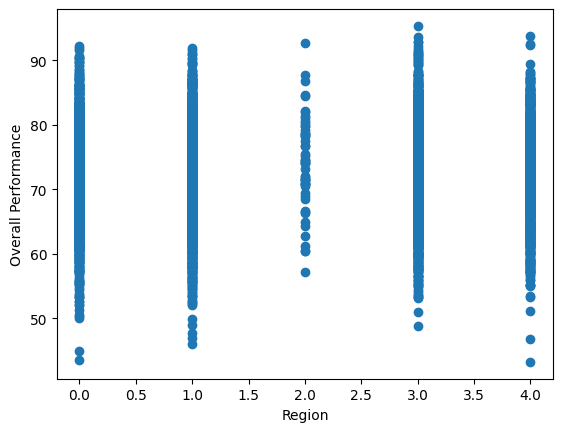

In [ ]:
plt.scatter(df['Region'], df['Overall Performance'])
plt.xlabel('Region')
plt.ylabel('Overall Performance')
plt.show()

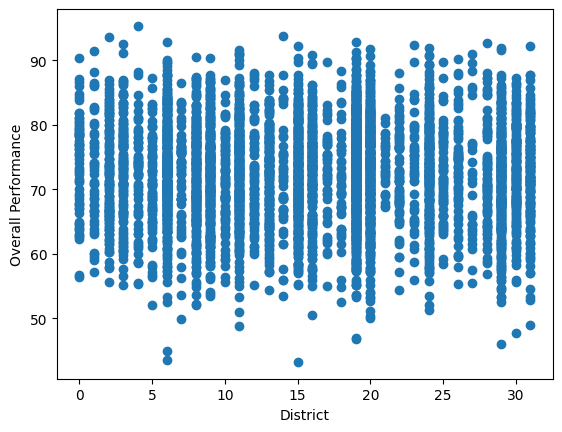

In [ ]:
plt.scatter(df['District'], df['Overall Performance'])
plt.xlabel('District')
plt.ylabel('Overall Performance')
plt.show()

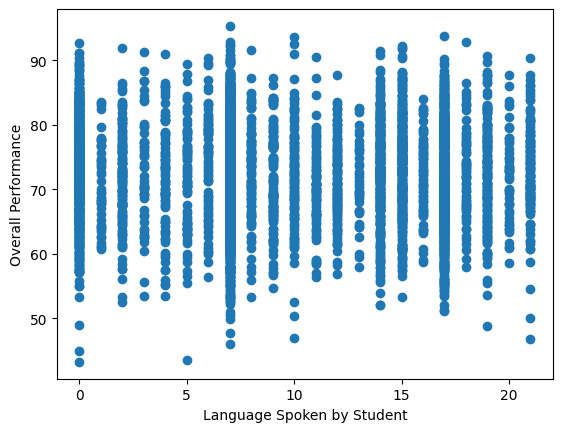

In [ ]:
plt.scatter(df['Language Spoken by Student'], df['Overall Performance'])
plt.xlabel('Language Spoken by Student')
plt.ylabel('Overall Performance')
plt.show()

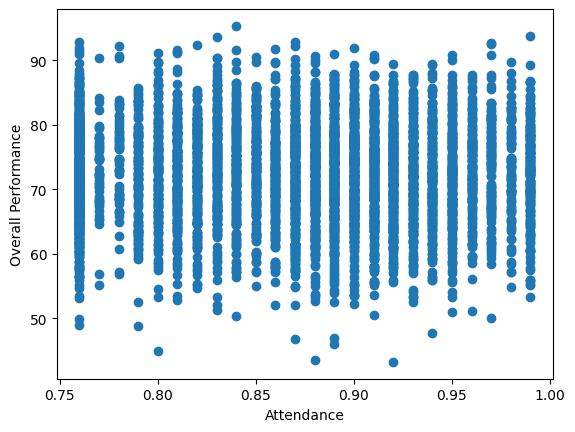

In [ ]:
plt.scatter(df['Attendance'], df['Overall Performance'])
plt.xlabel('Attendance')
plt.ylabel('Overall Performance')
plt.show()

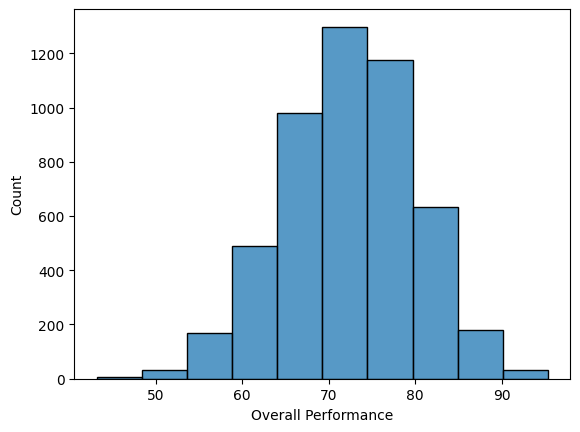

In [ ]:
# histogram of overall percentage
sns.histplot(df['Overall Performance'], bins=10)
plt.show()


In [ ]:
x = df.drop(['Overall Performance'], axis=1)
print(x)

      Age  Gender  Region  District  Language Spoken by Student  Math Term 1  \
0      17       0       1        15                           0           43   
1      15       0       0        24                          17           71   
2      17       0       1         8                          14           56   
3      15       1       4        11                          15           63   
4      15       1       0         8                          14           88   
...   ...     ...     ...       ...                         ...          ...   
4995   15       1       3        20                           3          100   
4996   15       0       3        20                           7           68   
4997   16       0       4         5                          15           99   
4998   17       1       1        20                          10          100   
4999   16       0       3        19                           7           59   

      Physics Term 1  Chemistry Term 1 

In [ ]:
y = df['Overall Performance']
y

0       61.777778
1       64.222222
2       73.000000
3       75.888889
4       74.111111
          ...    
4995    75.111111
4996    82.111111
4997    87.222222
4998    61.777778
4999    68.444444
Name: Overall Performance, Length: 5000, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [ ]:

# standardize the numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions

array([75.34777778, 69.73111111, 76.78666667, 70.86777778, 66.62444444,
       74.2       , 85.09111111, 72.11333333, 76.64444444, 62.15555556,
       84.42      , 62.69      , 65.05444444, 74.75222222, 65.84333333,
       65.98      , 74.64111111, 72.04111111, 81.35666667, 82.21666667,
       67.80111111, 66.15666667, 75.18111111, 66.35333333, 78.70222222,
       63.59222222, 77.72888889, 73.97888889, 71.34222222, 80.02777778,
       67.83333333, 72.72111111, 73.61444444, 76.61      , 69.08222222,
       70.82666667, 73.34666667, 67.15222222, 70.90111111, 69.24111111,
       77.93333333, 79.18111111, 64.76333333, 71.79      , 77.58444444,
       66.33222222, 66.68222222, 68.63      , 62.95777778, 68.35444444,
       69.72777778, 75.95111111, 74.40444444, 72.66111111, 85.44444444,
       79.28      , 78.85222222, 68.34      , 77.10888889, 60.53444444,
       64.49222222, 88.03555556, 70.16555556, 67.89555556, 78.52444444,
       78.62111111, 57.69888889, 62.89888889, 77.85111111, 63.55

In [ ]:
# ACCURACY OF THE MODEL
print(r2_score(predictions,y_test))


0.866211986157886


In [ ]:

print(mean_squared_error(predictions, y_test))
print(mean_absolute_error(predictions, y_test))

5.315576566666667
1.8234099999999998


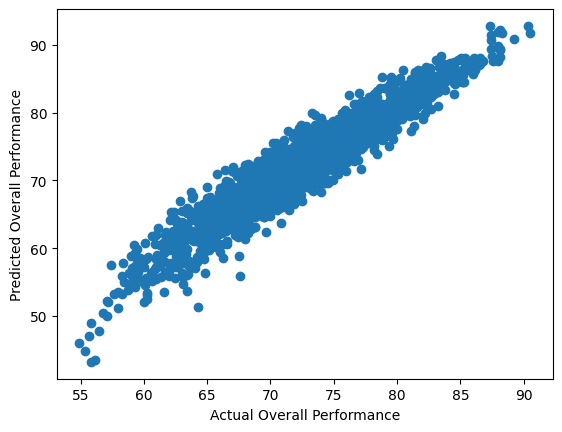

In [ ]:
# plot the predicted vs. actual values
plt.scatter(predictions, y_test)
plt.xlabel('Actual Overall Performance')
plt.ylabel('Predicted Overall Performance')
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 29.1 MB/s eta 0:00:00


In [ ]:
import numpy as np

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, x_test)


In [ ]:
from shap import TreeExplainer, summary_plot

In [ ]:
shap_values = TreeExplainer(model).shap_values(x_test)

In [ ]:
features = ['Age','Gender', 'Region', 'District', 'Language Spoken by Student', 'Math Term 1', 'Physics Term 1', 'Chemistry Term 1', 'Math Term 2', 'Physics Term 2', 'Chemistry Term 2', 'Math Term 3', 'Physics Term 3', 'Chemistry Term 3', 'Attendance']

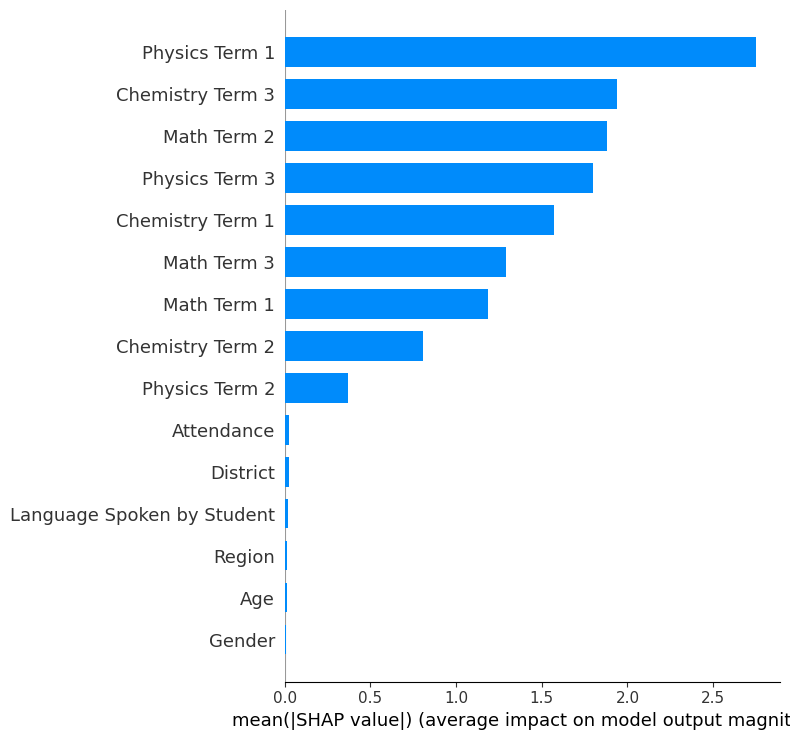

In [ ]:
shap.summary_plot(shap_values, x_train, feature_names=features, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


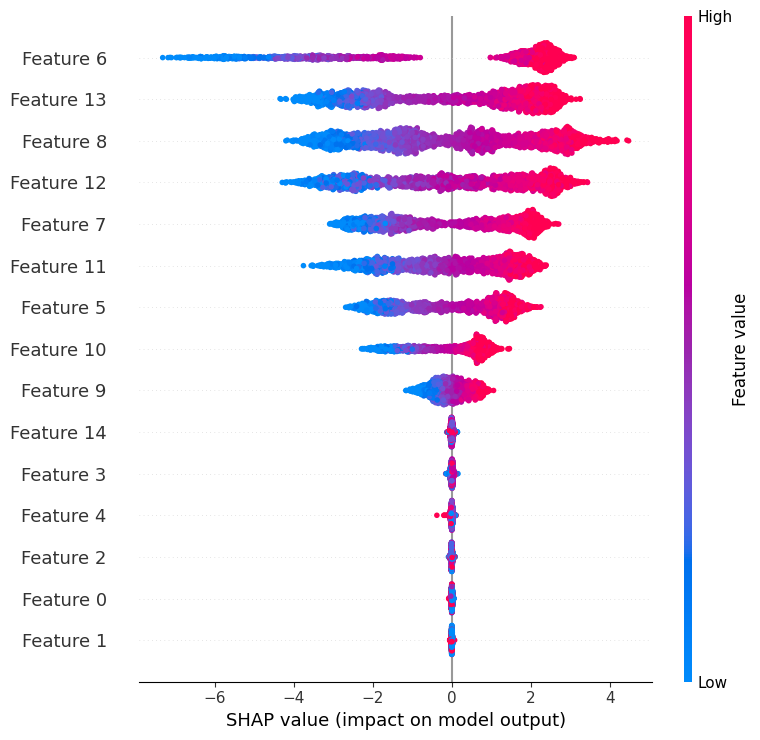

In [ ]:
summary_plot(shap_values, x_test)

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=a26e6119739e9e8020f15fd188dc05b522ba9997a26eb46ce93d2b64eedfbf76
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# Define the column names for X_train
x_train_columns = ['Age', 'Gender', 'Region', 'District', 'Language Spoken by Student', 'Math Term 1', 'Physics Term 1', 'Chemistry Term 1', 'Math Term 2', 'Physics Term 2', 'Chemistry Term 2', 'Math Term 3', 'Physics Term 3', 'Chemistry Term 3','Attendance']

In [ ]:
# Convert X_train from NumPy array to DataFrame
x_train_df = pd.DataFrame(x_train, columns=x_train_columns)

In [ ]:
# Create an explainer instance
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_df.values, feature_names=x_train_df.columns.values.tolist(),
                                                   class_names=['Overall Performance'], verbose=True, mode='regression')

In [ ]:
# Define the column names for X_test
x_test_columns = ['Age', 'Gender', 'Region', 'District', 'Language Spoken by Student', 'Math Term 1', 'Physics Term 1', 'Chemistry Term 1', 'Math Term 2', 'Physics Term 2', 'Chemistry Term 2', 'Math Term 3', 'Physics Term 3', 'Chemistry Term 3','Attendance']

In [ ]:
# Convert X_test from NumPy array to DataFrame
x_test_df = pd.DataFrame(x_test, columns=x_test_columns)

In [ ]:
#Select a particular instance for Explanations
i = 10
exp = explainer.explain_instance(x_test_df.values[i], model.predict, num_features=15)
#show predictions
exp.show_in_notebook(show_table=True)

Intercept 66.8263428773869
Prediction_local [83.07659258]
Right: 84.42000000000006


In [ ]:
exp.as_list()

[('0.36 < Physics Term 1 <= 0.86', 3.960686676595469),
 ('Math Term 2 > 0.74', 3.493584703158722),
 ('Physics Term 3 > 0.85', 3.3329980342888517),
 ('Math Term 3 > 0.81', 2.238864217288979),
 ('0.12 < Chemistry Term 3 <= 0.88', 2.1603079150740463),
 ('Math Term 1 > 0.82', 1.759461398042308),
 ('0.33 < Chemistry Term 2 <= 0.91', 1.344348507556958),
 ('Physics Term 2 <= -0.65', -1.0636314081742098),
 ('-0.75 < Chemistry Term 1 <= 0.07', -0.9252357194375298),
 ('-1.01 < Age <= 0.17', -0.2018353192663978),
 ('Language Spoken by Student <= -0.42', 0.17339080853468747),
 ('Attendance > 0.73', 0.13008934740878486),
 ('District > 0.49', -0.10228920048435856),
 ('Gender <= -0.80', -0.0719116742827699),
 ('Region <= -0.61', 0.021421416464054033)]

In [ ]:
#Select a particular instance for Explanations
i = 15
exp = explainer.explain_instance(x_test_df.values[i], model.predict, num_features=15)
#show predictions
exp.show_in_notebook(show_table=True)

Intercept 74.83857094421529
Prediction_local [63.6919772]
Right: 65.98
